## Setup

In [1]:
'''Locate the working directory'''
if __name__ == '__main__':    
    import sys
    from _path import workdir
    sys.path.append(workdir)
    print(sys.path[-1])

c:\Users\vince\OneDrive - The Chinese University of Hong Kong\python projects\py stellar perturbations\test\..


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.util.constants import msun
from src.static.tov_basic import solve_tov
from src.eos.poly import eos_poly

## Compute M-R curve

In [3]:
eos = eos_poly(k = 1.e35/(1.e15)**2, n = 1.)

tov=solve_tov(eos)

rho_list = np.logspace(13.,16.5,36)
m_list = np.zeros(len(rho_list))
r_list = np.zeros(len(rho_list))

for i in range(len(rho_list)):
    tov.ivp(p0= eos.p(rho_list[i]),pcut=1e20)
    m_list[i] = tov.m[-1]
    r_list[i] = tov.r[-1]

## Output to txt

In [4]:
np.savetxt('output.dat', np.c_[rho_list, r_list, m_list], fmt='%1.4e'\
                ,header='%10s %10s %10s'%('rho (cgs)','R (km)','M (M_sun)')\
                , comments='')

## Plot

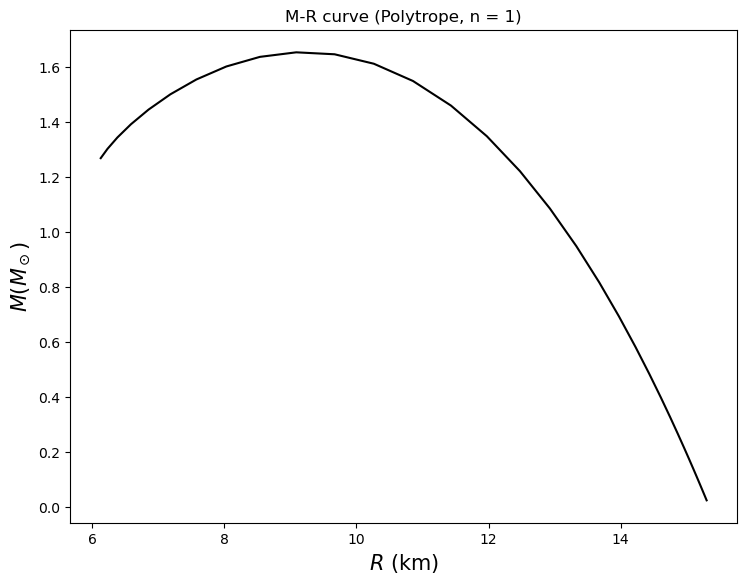

In [5]:
plt.figure(figsize=(8.6,6.4), dpi= 100)
plt.plot(r_list/1.e5, m_list/msun, 'k-')
plt.title(r'M-R curve (Polytrope, n = 1)')
plt.xlabel(r'$R$ (km)',fontsize=15)
plt.ylabel(r'$M (M_\odot)$',fontsize=15)
plt.show()
plt.close()